# Generating Histograms
@author: Ofer Shir, oshir@alumni.Princeton.EDU

## Map $\sigma$ to $p$ 

In [7]:
import numpy as np
from scipy.stats import entropy,geom,norm
import seaborn as sns
import matplotlib.pyplot as plt
import maxEntropy as ME
import binomialEntropy as BE
def expected_l1_norm_rounded_monte_carlo(mu=0, sigma=1, n=1, num_samples=10000) :
    # l1_norms = []
    # for _ in range(num_samples) :
    #     samples = np.random.normal(mean, std, n).round().astype(int)
    #     l1_norms.append(np.sum(np.abs(samples)))
    #     return np.mean(l1_norms)
    random_variables = np.random.normal(mu, sigma, (num_samples, n))
    rounded_variables = np.round(random_variables)
    l1_norms = np.sum(np.abs(rounded_variables), axis=1)
    return np.mean(l1_norms)
sigma_values = [0.5, 2, 5, 10]
S_values = [expected_l1_norm_rounded_monte_carlo(mu=0, sigma=s) for s in sigma_values]
p_values = [1.0 - ( sigma / (1.0+np.sqrt(1+(sigma**2))) ) for sigma in S_values]
print(f"sigma = {sigma_values}")
print(f"S = {S_values}")
print(f"p = {p_values}")

sigma = [0.5, 2, 5, 10]
S = [np.float64(0.3226), np.float64(1.5867), np.float64(3.9584), np.float64(7.9107)]
p = [np.float64(0.842691522860848), np.float64(0.448206280046617), np.float64(0.22121054860585332), np.float64(0.11845285157761842)]


## DG histograms

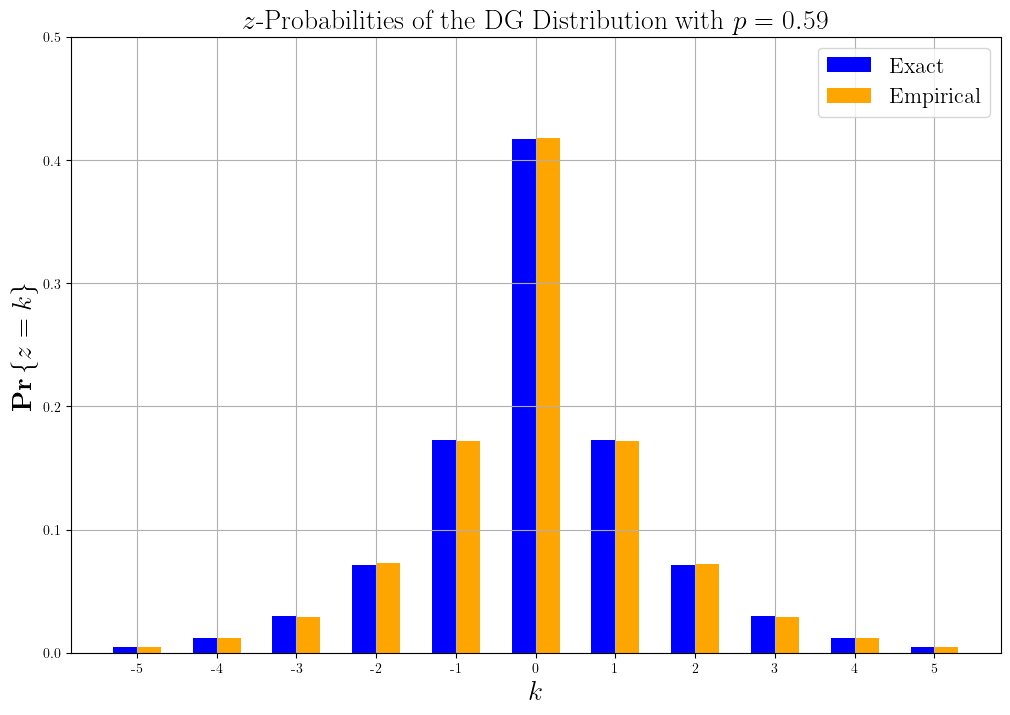

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
# from scipy.stats import geom, norm

# Define the corrected double-geometric probability mass function (PMF)
def double_geometric_pmf(k, p):
    normalization_factor = p / (2 - p)
    return normalization_factor * (1 - p) ** abs(k)

# Generate empirical histogram from double-geometric samples using the difference of two geometric RVs
def empirical_double_geometric_histogram(k_range, p, num_samples=100000):
    # normal_samples1 = np.random.multivariate_normal([0, 0], [[c11, cov12], [cov12, c22]], num_samples)
    # u_samples1 = norm.cdf(normal_samples1)
    # geom_samplesG1x = geom.ppf(u_samples1[:, 0], p).astype(int)
    geom1 = np.random.geometric(p, size=num_samples) - 1
    geom2 = np.random.geometric(p, size=num_samples) - 1
    samples = geom1 - geom2
    
    # Create a histogram for the given range of k values
    hist, bin_edges = np.histogram(samples, bins=np.arange(min(k_range) - 0.5, max(k_range) + 1.5, 1), density=True)
    return hist * (bin_edges[1] - bin_edges[0])  # Scale to probabilities

# Parameters
S_values = [1,2,3,4]
p_vals = [1.0 - ( sigma / (1.0+np.sqrt(1+(sigma**2))) ) for sigma in S_values]
p = p_vals[0]
formatted_p = f"{p:.2f}"
k_range = np.arange(-5, 6)  # Range of k values
# k_range = np.arange(-10, 11)  # Range of k values
# k_range = np.arange(-15, 16)  # Range of k values
# k_range = np.arange(-20, 21)  # Range of k values
num_samples = 100000  # Number of samples for empirical histogram

# Calculate theoretical and empirical probabilities
theoretical_probs = np.array([double_geometric_pmf(k, p) for k in k_range])
theoretical_probs /= np.sum(theoretical_probs)
empirical_probs = empirical_double_geometric_histogram(k_range, p, num_samples)
empirical_probs /= np.sum(empirical_probs)
# Plot the results
plt.figure(figsize=(12,8))
k_labels = [str(k) for k in k_range]
x_positions = np.arange(len(k_range))

plt.bar(x_positions - 0.15, theoretical_probs, width=0.3, label="Exact", color="blue")
plt.bar(x_positions + 0.15, empirical_probs, width=0.3, label="Empirical", color="orange")

plt.xticks(x_positions, k_labels)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.ylabel('ESs\' Obtained Integers Error Rate',fontsize=14)
plt.xlabel(r"$k$",fontsize=20)
plt.ylabel(r"$\mathbf{Pr} \left\{z=k\right\}$",fontsize=20)
plt.title(f"$z$-Probabilities of the DG Distribution with $p = {formatted_p}$",fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
# plt.xlim(k_range[0],k_range[-2])
plt.ylim(0,0.5)
plt.savefig("DG_S1.png", dpi=300)
plt.show()

## TN histograms

<>:76: SyntaxWarning: invalid escape sequence '\s'
<>:76: SyntaxWarning: invalid escape sequence '\s'
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_50943/922811834.py:76: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"int$(z)$-Probabilities of the TN Distribution with $\sigma = {formatted_sigma}$",fontsize=20)


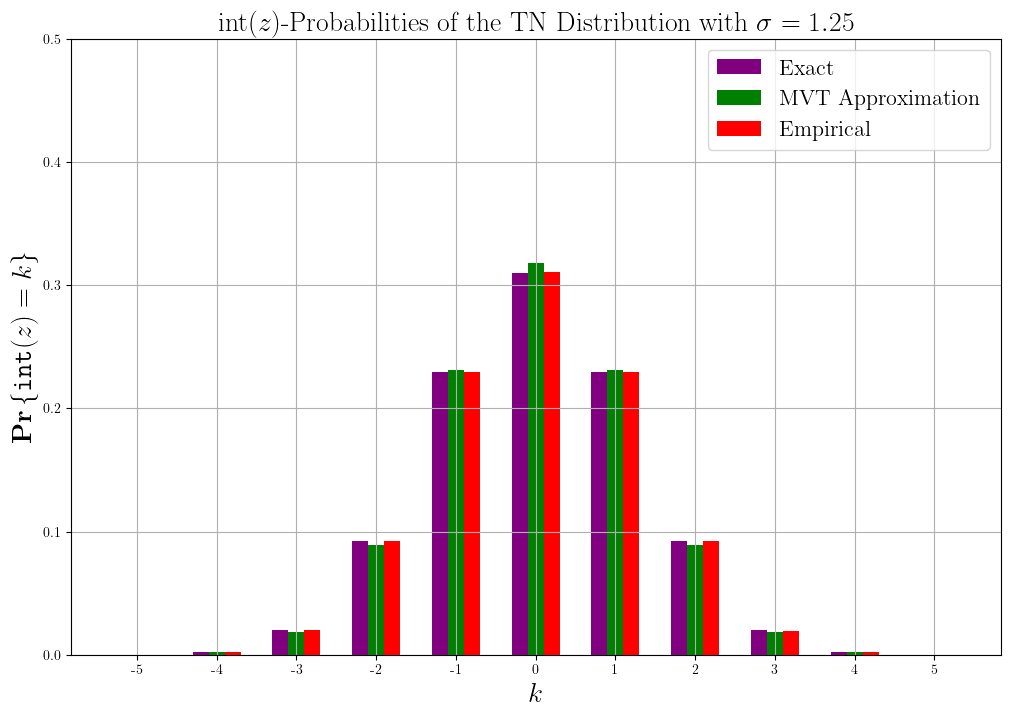

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
# from matplotlib import rc
# import EntropyEstimation as EE
# from scipy.stats import norm

# Define the exact truncated normal probability
def exact_probability(k, sigma):
    x1 = (k + 0.5) / (np.sqrt(2) * sigma)
    x2 = (k - 0.5) / (np.sqrt(2) * sigma)
    return 0.5 * (erf(x1) - erf(x2))

# Define the MVT approximation for the probability
def mvt_probability(k, sigma):
    # x1 = (k + 0.5) / (np.sqrt(2) * sigma)
    # x2 = (k - 0.5) / (np.sqrt(2) * sigma)
    # c = (x1 + x2) / 2  # Use midpoint for MVT
    # dx = x1 - x2
    # erf_derivative = (2 / np.sqrt(np.pi)) * np.exp(-c**2)
    # return 0.5 * erf_derivative * dx
    c = k / (np.sqrt(2) * sigma)
    return np.exp(-c**2) / np.sqrt(np.pi)

def asymp_probability(k, sigma):
    x1 = (k + 0.5) / (np.sqrt(2) * sigma)
    x2 = (k - 0.5) / (np.sqrt(2) * sigma)
    e1 = (np.exp(-x1**2) / (np.sqrt(np.pi)*x1))
    e2 = (np.exp(-x2**2) / (np.sqrt(np.pi)*x2))
    return 0.5 * np.abs((e2-e1))

# Empirical evaluation of the probability
def empirical_histogram(k_range, sigma, num_samples=100000):
    samples = np.round(np.random.normal(0, sigma, num_samples))
    hist, bin_edges = np.histogram(samples, bins=np.arange(min(k_range) - 0.5, max(k_range) + 1.5, 1), density=True)
    return hist * (bin_edges[1] - bin_edges[0])  # Scale to probabilities

# Parameters
# sigma_vals = [0.5, 2, 5, 10]
# S = [np.float64(0.3134), np.float64(1.6008), np.float64(3.9653), np.float64(8.0925)]
# p = [np.float64(0.8469696459281926), np.float64(0.44560552681299637), np.float64(0.22087853609664143), np.float64(0.11596521178508257)]
S_values = [1,2,3,4]
sigma_vals = S_values / ( np.sqrt(2 / np.pi))
k_range = np.arange(-5, 6)  # Range of k values

sigma = sigma_vals[0]
formatted_sigma = f"{sigma:.2f}"
num_samples = 100000  # Number of samples for empirical histogram

# Calculate probabilities
exact_probs = np.array([exact_probability(k, sigma) for k in k_range])
exact_probs /= np.sum(exact_probs)
mvt_probs = np.array([mvt_probability(k, sigma) for k in k_range])
mvt_probs /= np.sum(mvt_probs)
# asym_probs = np.array([asymp_probability(k, sigma) for k in k_range])
# asym_probs /= np.sum(asym_probs)
empirical_probs = empirical_histogram(k_range, sigma, num_samples)
empirical_probs /= np.sum(empirical_probs)

# Plot the results
plt.figure(figsize=(12,8))
k_labels = [str(k) for k in k_range]
x_positions = np.arange(len(k_range))

plt.bar(x_positions - 0.2, exact_probs, width=0.2, label="Exact", color="purple")
plt.bar(x_positions, mvt_probs, width=0.2, label="MVT Approximation", color="green")
# plt.bar(x_positions, asym_probs, width=0.2, label="Asymptotic Expansion", color="green")
plt.bar(x_positions + 0.2, empirical_probs, width=0.2, label="Empirical", color="red")

plt.xticks(x_positions, k_labels)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.ylabel('ESs\' Obtained Integers Error Rate',fontsize=14)
plt.xlabel(r"$k$",fontsize=20)
plt.ylabel(r"$\mathbf{Pr}\left\{\texttt{int}(z)=k\right\}$",fontsize=20)
plt.title(f"int$(z)$-Probabilities of the TN Distribution with $\sigma = {formatted_sigma}$",fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.ylim(0,0.5)
plt.savefig("TN_S1.png", dpi=300)
plt.show()